![nchs](nchs.png)

# <center><font color='navy' size=6> HW 3: Call to Action</font></center>
<center><font size=3><i>By Marisol Hernandez</i></font></center>  
<center><font size=3><i>02/07/2021</i></font></center>

---

## <font color='navy'> Table of Contents</font>

[I. Objective](#objective)  
[II. Data Mining](#data)  
[III. Findings](#findings)  
[IV. Reconmmendations](#recommendations)  

## <font color='navy'> Objective</font><a id='objective'></a>
---

A JSON file can be an extremely useful tool to easily store information in an organized, easy-to-acess manner. With the basics of data mining, users can retrieve actionable findings from any JSON file. In this notebook, I have chosen to mine a JSON file provided by the [National Center for Health Statistics](https://www.cdc.gov/nchs/index.htm). This file presents data on the 10 leading causes of death in the United States beginning in 1999. This includes data on mortality statistics, age-adjusted death rate, cause of death, and demographic. "*Data are based on information from all resident death certificates filed in the 50 states and the District of Columbia using demographic and medical characteristics*."

With this file, there is a lot to learn. In addition to data mining, I ultimately decided to drive my investigation with the following questions:
- **What is the leading cause of death within the United States?**  
- **Can we examine a trend in death rates? Say in suicide, for example.**
- **Is it possible to examine mortality statistics by demographic?**

With this information, federal and/or state officials can not only understanding how many people are dying, but more importantly why so that they can make public health decisions that could potentially improve and save lives.

## <font color='navy'> Data Mining</font><a id='data'></a>
---
To begin, I important the library required to parse my JSON file. I then open, read, and close the file.

In [21]:
# Import library
import json
import matplotlib.pyplot as plt

# Open json file
myfile = open("LeadingCausesofDeathUnitedStates.json", "r")

# Read in file
parsed = json.load(myfile)
# Close file
myfile.close()

I am interested in the data type of **`parsed`**. We know now that it is of type dictionary:

In [22]:
# Print type
print(type(parsed))

<class 'dict'>


I am interested in the total length of the dictionary. This would tell me the number of items in the dictionary. From the output, we know that it has <ins>2 items</ins>.

In [23]:
# Print length of dictionary
len(parsed)

2

We know that a dictionary in Python is an unordered collection of data values. But unlike other data types that hold only a single value as an element, a dictionary holds a **`key : value`** pair as an element. Because the length of my dictionary is 2, I am expecting only 2 keys. We can use `.key()` method to return a list of all keys in the dictionary:

In [24]:
# Print keys of dictionary
parsed.keys()

dict_keys(['meta', 'data'])

### `meta` Key
The output above returns 2 keys as expected. Let's dig into the **`meta`** key to learn a little more about it. First, I learn its data type is also a dictionary:

In [25]:
type(parsed['meta'])

dict

Let's go ahead and print the keys:

In [26]:
# Keys of meta
parsed['meta'].keys()

dict_keys(['view'])

**`meta`** only has one key. Let's see what its data type is:

In [27]:
# Type of view
type(parsed['meta']['view'])

dict

**`view`** is also a dictionary. Before we go any further lets print its keys:

In [28]:
# Keys of view
parsed['meta']['view'].keys()

dict_keys(['id', 'name', 'assetType', 'attribution', 'averageRating', 'category', 'createdAt', 'description', 'displayType', 'downloadCount', 'hideFromCatalog', 'hideFromDataJson', 'indexUpdatedAt', 'licenseId', 'newBackend', 'numberOfComments', 'oid', 'provenance', 'publicationAppendEnabled', 'publicationDate', 'publicationGroup', 'publicationStage', 'rowClass', 'rowsUpdatedAt', 'rowsUpdatedBy', 'tableId', 'totalTimesRated', 'viewCount', 'viewLastModified', 'viewType', 'approvals', 'columns', 'grants', 'license', 'metadata', 'owner', 'query', 'rights', 'tableAuthor', 'tags', 'flags'])

The print out above tells us that **`meta`** gives us a little more information about the data structure and modifications of our JSON file. Though this information could be particularly useful, I am more interested in the data itself. Lets dig more into the **`data`** key instead.

### `data` Key

First I learn that **`data`** is a list as opposed to a dictionary:

In [29]:
type(parsed['data'])

list

It is safe to assume that **`data`** is a list containing the data records. Lets see how many data records we have by printing the length of **`data`**:

In [30]:
# Length of data
len(parsed['data'])

10868

The print out above tells us we're handling *10,868* observations. Lets see what the first observation looks like:

In [31]:
parsed['data'][0]

['row-4ziw_fype-q93g',
 '00000000-0000-0000-84F0-BE0C2CBEC77B',
 0,
 1571926784,
 None,
 1571926784,
 None,
 '{ }',
 '2017',
 'Accidents (unintentional injuries) (V01-X59,Y85-Y86)',
 'Unintentional injuries',
 'United States',
 '169936',
 '49.4']

The first observation gives us a range of information. The only information we're interested in however is the *Year*, *113 Cause Name*, *Cause Name*, *State*, *Deaths*, and *Age-adjusted Death Rate*. In this case, we'll subset each observation so that it returns the last 6 elements within its list:

In [32]:
# Last 6 elements of the first observation
parsed['data'][0][-6:]

['2017',
 'Accidents (unintentional injuries) (V01-X59,Y85-Y86)',
 'Unintentional injuries',
 'United States',
 '169936',
 '49.4']

Above I subset just the first element. Below I use a `for` loop to subset all observations and store it in **`data`** :

In [33]:
# Subset all observations and store in data
data = []

for i in range(0,10868):
    data.append(parsed['data'][i][-6:])

I want to get a list of unique values for year. To do so, I use a `for` loop to run through each of my observations and retrieve the first element, representing the year. I then utilize `set()` and `.sort()` to retrieve a sorted list with unique values for year. We now know that our data ranges from ***1999 - 2017***.

In [34]:
# Get unique values for year
year = []

for i in range(0,10868):
    year.append(data[i][0])

unique_year = list(set(year))
unique_year.sort()

', '.join(unique_year)

'1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017'

Similarly, I want to get a list of unique values for state. Following the same procedure with the fourth element of each observation, I retrieve a sorted list with unique values for state. Interestingly enough, the *United States* is included within the list.

In [35]:
# Get unique values for state
state = []

for i in range(0,10868):
    state.append(data[i][3])

unique_state = list(set(state))
unique_state.sort()

', '.join(unique_state)

'Alabama, Alaska, Arizona, Arkansas, California, Colorado, Connecticut, Delaware, District of Columbia, Florida, Georgia, Hawaii, Idaho, Illinois, Indiana, Iowa, Kansas, Kentucky, Louisiana, Maine, Maryland, Massachusetts, Michigan, Minnesota, Mississippi, Missouri, Montana, Nebraska, Nevada, New Hampshire, New Jersey, New Mexico, New York, North Carolina, North Dakota, Ohio, Oklahoma, Oregon, Pennsylvania, Rhode Island, South Carolina, South Dakota, Tennessee, Texas, United States, Utah, Vermont, Virginia, Washington, West Virginia, Wisconsin, Wyoming'

Similarly, I want to get a list of unique values for cause name. Following the same procedure with the third element of each observation, I retrieve a sorted list with unique values for cause name:

In [36]:
# Get unique values for Cause Name
accident = []

for i in range(0,10868):
    accident.append(data[i][2])
    
unique_acc = list(set(accident))
unique_acc.sort()

', '.join(unique_acc)

"All causes, Alzheimer's disease, CLRD, Cancer, Diabetes, Heart disease, Influenza and pneumonia, Kidney disease, Stroke, Suicide, Unintentional injuries"

I am not interested in *All causes* so I use `.remove()` to remove the element from my list **`unique_acc`**:

In [37]:
# Remove 'All causes'
unique_acc.remove('All causes')
', '.join(unique_acc)

"Alzheimer's disease, CLRD, Cancer, Diabetes, Heart disease, Influenza and pneumonia, Kidney disease, Stroke, Suicide, Unintentional injuries"

Next, I want to address my first research question, ***What is the leading cause of death within the United States?*** I decided that I want to make a general function that takes in two parameters, the year and state, so that it returns a bar plot with the mortality statistics for each of the leading causes. From the plot, we should then be able to identify the leading cause of death within any demographic. Within my function, I subset the data so that I only have records for the specified year and state. I then create a horizontal bar graph with the total deaths for each of the leading causes.

In [38]:
def yearly_report(year, state):
    records = []
    
    for i in data:
        if (i[0] == str(year)) & (i[3] == str(state)):
            records.append(i)
            
    total_deaths = []
    
    for i in unique_acc:
        for j in records:
            if j[2] == i:
                total_deaths.append(int(j[4]))

    bar_data = {unique_acc[i] : total_deaths[i] for i in range(0, len(total_deaths))} 
    sorted_bar_data = {}
    keys = sorted(bar_data, key=bar_data.get, reverse=False)
    for i in keys:
        sorted_bar_data[i] = bar_data[i]
    
    fig = plt.figure(figsize =(18, 10))
    plt.barh(list(sorted_bar_data.keys()), list(sorted_bar_data.values()), align='center')
    plt.xlabel(("Total Deaths in " + str(year)))
    plt.ylabel('Cause Name')
    plt.title(('Total Deaths by Cause Within\nthe ' + str(state) + " (" + str(year) + ")"))
    plt.show()

Next, I want to address my second research question, ***Can we examine a trend in death rates?*** I decided that I want to make a general function that takes in two parameters, the cause and state, so that it returns a bar plot with the yearly mortality statistics for the specified cause in the specified demographic. From the plot, we should then be able to identify if there exists a trend in the cause of interest. Within my function, I subset the data so that I only have records for the specified cause and state. I then create a horizontal bar graph with the total deaths for each year.

In [39]:
def trend_report(cause, state):
    records = []
    
    for i in data:
        if (i[2] == str(cause)) & (i[3] == str(state)):
            records.append(i)
    
    total_deaths = []
    all_years = []
    
    for i in records:
        total_deaths.append(int(i[4]))
        all_years.append(i[0])
    
    fig = plt.figure(figsize =(18, 10))
    
    plt.barh(all_years, total_deaths, align='center')
    plt.xlabel("Total Deaths")
    plt.ylabel('Year')
    plt.title(('Total Deaths by Suicide Within ' + str(state)))
    plt.show()

## <font color='navy'> Findings</font><a id='findings'></a>
---

#### What is the leading cause of death within the United States?

Using my defined function, we can finally answer my first research question. The plot below provides us with a visualization of the mortality rates for the 10 leading causes of death in the United States from 2017. We can conclude that heart disease has claimed the first spot as the leading cause of death in the United States, closely followed by cancer.

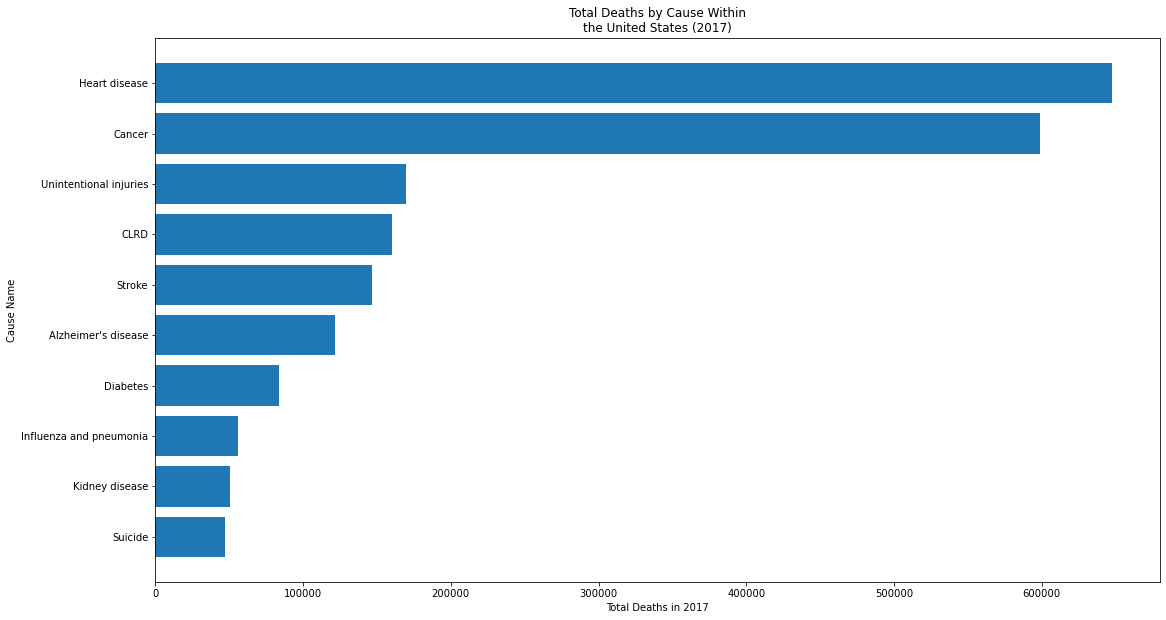

In [40]:
yearly_report(2017, "United States")

#### Can we examine a trend in death rates? 
Using another defined question, we can go ahead an answer my second research question. I decided I wanted to investigate whether there exists a trend in suicide rates within the state of California. The plot below reveals a steady increase in suicide deaths within the state of California. To answer my research question, yes we can use the JSON file to examine a trend in death rates. In fact, my defined function enables us to examine trends either by cause or state as long as we specify.

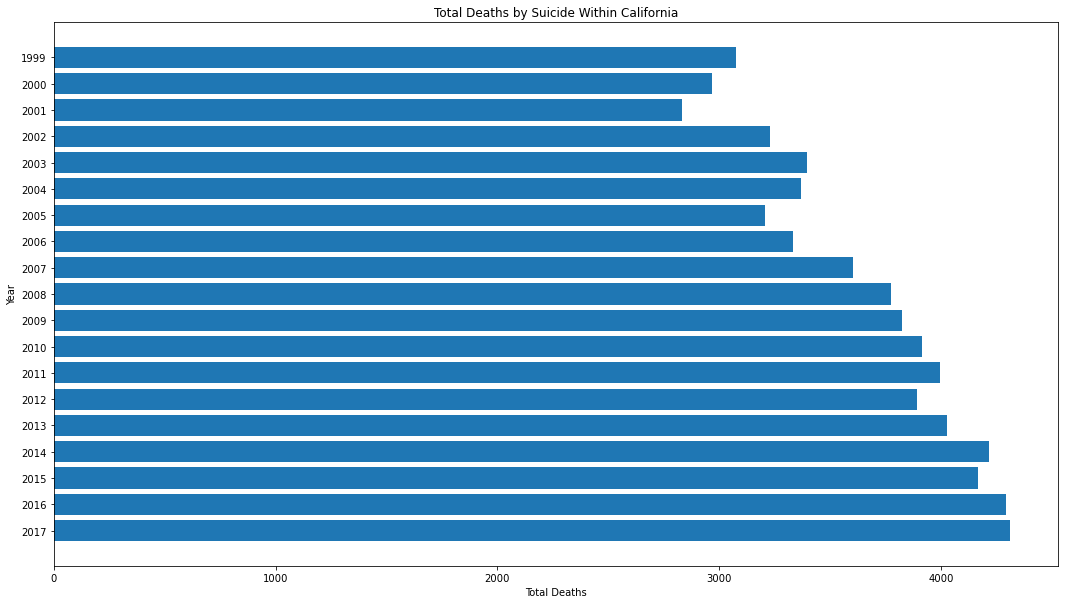

In [41]:
trend_report('Suicide', 'California')

## <font color='navy'> Recommendations</font><a id='recommendations'></a>
---

National and state mortality data are important because it can help us better understand how many people are dying and, more importantly, why. With this data, we can reveal trends and emerging challenges (for example, COVID-19), track the effectiveness of interventions (for example, vaccine distributions), and help public health officials make decisions that could potentially improve and save lives.

The JSON file provided by the [National Center for Health Statistics](https://www.cdc.gov/nchs/index.htm) captures all death records from across every state in the United States. For my investigation, I decided to parse through this JSON file to identify the leading causes of death within the nation, as well as identify any potential trends. With a user defined function, I concluded that heart disease is the leading cause of death within the United States. I also identified an increasing trend in suicide deaths within the state of California. With this information, public health officials should respond with the right treatment and interventions to prevent any further deaths from occuring.

It is important to note, however, that my defined functions **`yearly_report`** and **`trend_report`** enables users to define their desired records. Using **`yearly_report`**, for example, I could decide to view the leading causes of death within the state of Texas from 2000 by simply specifying. So, answering my third research question, ***Is it possible to examine mortality statistics by demographic?***, yes we can. This capability can be extremely useful for researchers, clinicians, policymakers, and many others. With this capability, national and state public health officials can easily identify public health issues by demographic so that they can come up with a rapid respose that could potentially save lives.